# 概要
    <1> 導入套件
    <2> 讀取並初步處理資料
    <3> 統計分析
    <4> 計算時間序列變化
    <5> 改變時間序列資料的時間單位
    <6> 時間窗口
    <7> 股票時間序列分析
    <8> 迴歸分析

## <1> 導入套件

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

## <2> 讀取並初步處理資料

In [2]:
data = pd.read_csv('data.csv', index_col = 0, parse_dates = True)

In [3]:
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [4]:
data.dropna(inplace = True)
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


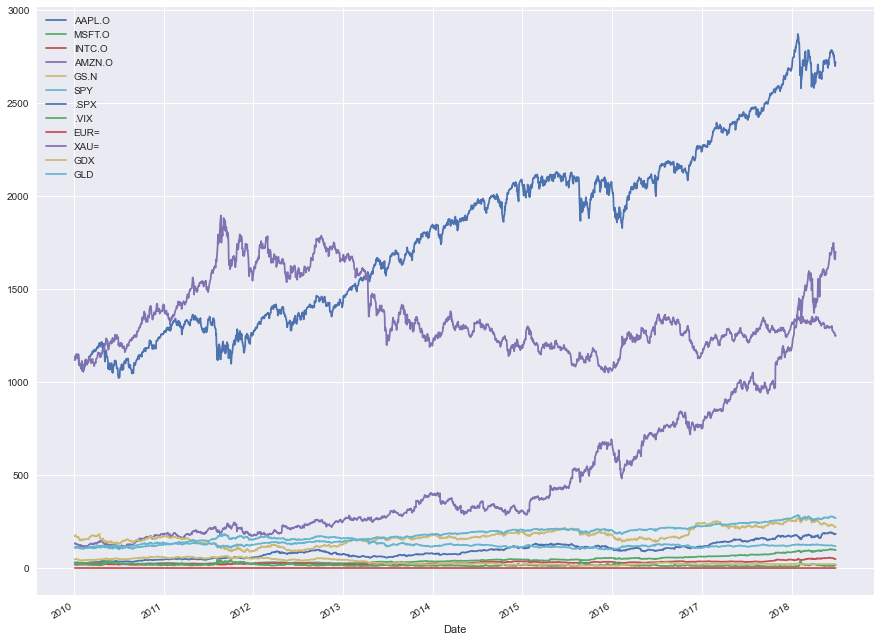

In [5]:
data.plot( figsize = (15,12) )

## <3> 統計分析

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2138 non-null   float64
 9   XAU=    2138 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 217.1 KB


In [7]:
data.describe().round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1348.91,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.21,15.17,18.78
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
25%,60.29,28.57,22.51,213.60,146.61,133.99,1338.57,13.07,1.13,1222.49,22.14,117.40
50%,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.68,25.62,124.00
75%,117.24,54.37,34.71,698.85,192.13,210.99,2108.94,19.07,1.35,1427.57,48.34,139.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1897.10,66.63,184.59


In [8]:
# 使用aggregate將想要呈現的統計量一次呈現出來
data.aggregate( [min, np.median,  max, np.mean, np.std] ).round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
median,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.68,25.62,124.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1897.10,66.63,184.59
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1348.91,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.21,15.17,18.78


## <4> 計算時間序列變化

#### 1.各指標每天差異值(後減前)

In [9]:
data.diff().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.052857,0.010,-0.01,0.79,3.06,0.30,3.53,-0.69,-0.0043,-1.35,0.46,-0.10
2010-01-06,-0.487142,-0.190,-0.07,-2.44,-1.88,0.08,0.62,-0.19,0.0044,19.85,1.17,1.81
2010-01-07,-0.055714,-0.318,-0.20,-2.25,3.41,0.48,4.55,-0.10,-0.0094,-6.60,-0.24,-0.69
2010-01-08,0.200000,0.208,0.23,3.52,-3.36,0.38,3.29,-0.93,0.0094,4.20,0.74,0.55


In [10]:
# 差異平均
data.diff().aggregate( [np.mean, np.std] ).head().round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
mean,0.07,0.03,0.01,0.73,0.02,0.07,0.74,-0.00,-0.00,0.06,-0.01,0.00
std,1.48,0.67,0.47,10.19,2.65,1.56,15.61,1.65,0.01,14.22,0.78,1.38


#### 2.各指標的日成長率，函數 : pct_change

In [11]:
data.pct_change().head().round(4)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.0017,0.0003,-0.0005,0.0059,0.0177,0.0026,0.0031,-0.0344,-0.0030,-0.0012,0.0096,-0.0009
2010-01-06,-0.0159,-0.0061,-0.0034,-0.0181,-0.0107,0.0007,0.0005,-0.0098,0.0031,0.0177,0.0243,0.0165
2010-01-07,-0.0018,-0.0103,-0.0096,-0.0170,0.0196,0.0042,0.0040,-0.0052,-0.0065,-0.0058,-0.0049,-0.0062
2010-01-08,0.0066,0.0068,0.0112,0.0271,-0.0189,0.0033,0.0029,-0.0488,0.0066,0.0037,0.0151,0.0050


In [12]:
data.pct_change().aggregate( [np.mean, np.std] ).head().round(4)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
mean,0.0010,0.0006,0.0005,0.0014,0.0003,0.0005,0.0005,0.0030,-0.0001,0.0001,-0.0001,0.0001
std,0.0159,0.0142,0.0149,0.0195,0.0165,0.0093,0.0093,0.0823,0.0059,0.0101,0.0237,0.0102


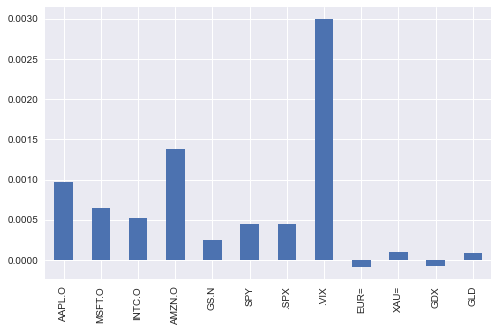

In [13]:
data.pct_change().mean().plot( kind = 'bar', figsize = (8,5) )

#### 3.計算連續時間成長率

In [14]:
# 將全部資料往前挪1天
data.shift(1).head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-06,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-07,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-08,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [15]:
# 計算日報酬率(成長率)
returns = np.log( data / data.shift(1) )
returns.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001727,0.000323,-0.000479,0.005883,0.017525,0.002644,0.003111,-0.035038,-0.002988,-0.001206,0.009595,-0.000911
2010-01-06,-0.016034,-0.006156,-0.003360,-0.018282,-0.010731,0.000704,0.000545,-0.009868,0.003058,0.017589,0.023999,0.016365
2010-01-07,-0.001850,-0.010389,-0.009662,-0.017160,0.019379,0.004212,0.003993,-0.005233,-0.006544,-0.005814,-0.004876,-0.006207
2010-01-08,0.006626,0.006807,0.011103,0.026717,-0.019093,0.003322,0.002878,-0.050024,0.006544,0.003704,0.014959,0.004951


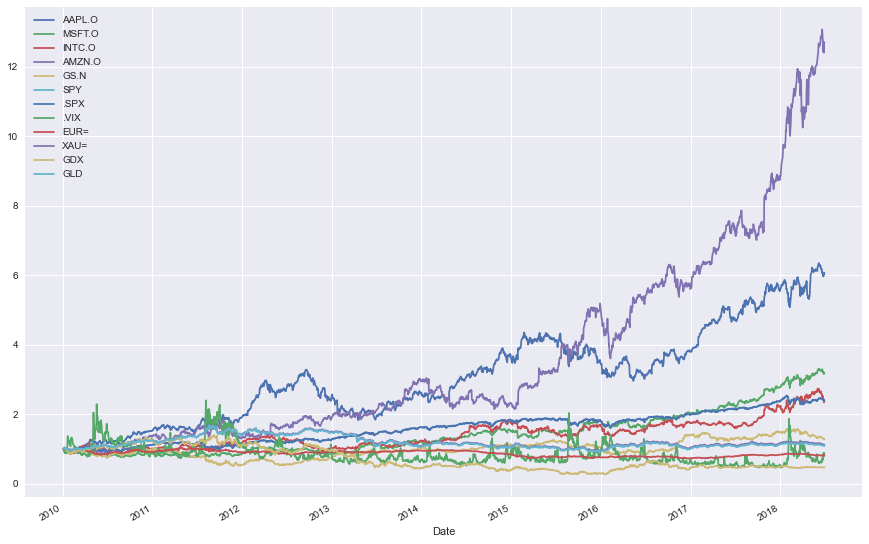

In [16]:
# 計算1元的本利和
returns.cumsum().apply(np.exp).plot( figsize = (15,10) )

## <5> 改變時間序列資料的時間單位

In [17]:
# 將時間單位從天改為週，指定每七天的最後一筆代表該週的資料
data.resample('1W').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-10,30.282827,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-17,29.418542,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.4382,1129.90,47.42,110.86
2010-01-24,28.249972,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.4137,1092.60,43.79,107.17
2010-01-31,27.437544,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.3862,1081.05,40.72,105.96
2010-02-07,27.922829,28.02,19.47,117.39,154.16,106.66,1066.19,26.11,1.3662,1064.95,42.41,104.68


In [18]:
# left : 將新的時間單位之最後一天作為一筆資料的標籤(date) 
# right : 將新的時間單位之第一天作為一筆資料的標籤
# 上述兩個指令與上個區塊的程式碼之「last()」獨立
# last控制數值，left或right控制標籤
data.resample('2D', label = 'left').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.625684,30.960,20.87,134.690,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.082827,30.452,20.60,130.000,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.520,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-10,30.015684,30.270,20.95,130.308,171.56,114.73,1146.98,17.55,1.4513,1152.60,50.17,112.85
2010-01-12,30.092827,30.350,20.96,129.110,169.07,114.62,1145.68,17.85,1.4510,1138.40,48.86,111.54


In [19]:
data.resample('2D', label = 'right').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-06,30.625684,30.960,20.87,134.690,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-08,30.082827,30.452,20.60,130.000,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-10,30.282827,30.660,20.83,133.520,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-12,30.015684,30.270,20.95,130.308,171.56,114.73,1146.98,17.55,1.4513,1152.60,50.17,112.85
2010-01-14,30.092827,30.350,20.96,129.110,169.07,114.62,1145.68,17.85,1.4510,1138.40,48.86,111.54


## <6> 時間窗口

In [20]:
w = 10

In [21]:
# rolling(window = w).mean() : 呈現資料每w筆中的平均值
# 例如 : 新的第一筆資料為「原始資料1~10」的平均值
#        新的第二筆資料為「原始資料2~11」的平均值

data['AAPL.O'].rolling(window = w).mean().head(20)

Date
2010-01-04          NaN
2010-01-05          NaN
2010-01-06          NaN
2010-01-07          NaN
2010-01-08          NaN
2010-01-11          NaN
2010-01-12          NaN
2010-01-13          NaN
2010-01-14          NaN
2010-01-15    30.082256
2010-01-19    30.096970
2010-01-20    30.059041
2010-01-21    30.017641
2010-01-22    29.834356
2010-01-25    29.707142
2010-01-26    29.647570
2010-01-27    29.649913
2010-01-28    29.487628
2010-01-29    29.239528
2010-02-01    29.079528
Name: AAPL.O, dtype: float64

In [22]:
data['min'] = data['AAPL.O'].rolling(window = w).min()
data['max'] = data['AAPL.O'].rolling(window = w).max()
data['mean'] = data['AAPL.O'].rolling(window = w).mean()
data['std'] = data['AAPL.O'].rolling(window = w).std()

In [23]:
data.tail(10)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD,min,max,mean,std
Date,,,,,,,,,,,,,,,,
2018-06-18,188.74,100.86,53.22,1723.79,231.39,276.56,2773.75,12.31,1.1622,1277.9100,22.27,121.11,188.74,193.98,191.504,1.820026
2018-06-19,185.69,100.86,52.93,1734.78,228.32,275.50,2762.59,13.35,1.1588,1274.3700,22.05,120.80,185.69,193.98,190.742,2.461864
2018-06-20,186.50,101.87,53.46,1750.08,227.82,275.97,2767.32,12.79,1.1570,1267.7000,21.92,120.26,185.69,193.46,189.994,2.504703
2018-06-21,185.46,101.14,52.19,1730.22,226.98,274.24,2749.76,14.64,1.1601,1266.8101,21.91,120.05,185.46,192.28,189.194,2.551815
2018-06-22,184.92,100.41,52.50,1715.67,226.02,274.74,2754.88,13.77,1.1655,1268.4900,22.18,120.34,184.92,192.28,188.516,2.707932
2018-06-25,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.1702,1265.0000,22.01,119.89,182.17,192.28,187.610,3.174440
2018-06-26,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.1645,1258.6400,21.95,119.26,182.17,190.80,186.825,2.844778
2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.1552,1251.6200,21.81,118.58,182.17,190.80,186.171,2.595815
2018-06-28,185.50,98.63,49.25,1701.45,223.42,270.89,2716.31,16.85,1.1567,1247.8800,21.93,118.22,182.17,188.84,185.641,2.023690


## <7> 股票時間序列分析

#### 1.短期平均線&長期平均線

In [24]:
data['20MA'] = data['AAPL.O'].rolling(window = 20).mean()
data['120MA'] = data['AAPL.O'].rolling(window = 120).mean()

In [25]:
data[['AAPL.O','20MA','120MA']].tail()

,AAPL.O,20MA,120MA
Date,,,
2018-06-25,182.17,189.2060,176.679917
2018-06-26,184.43,189.0325,176.781583
2018-06-27,184.16,188.8655,176.874333
2018-06-28,185.50,188.7970,176.961833
2018-06-29,185.11,188.5405,177.051500


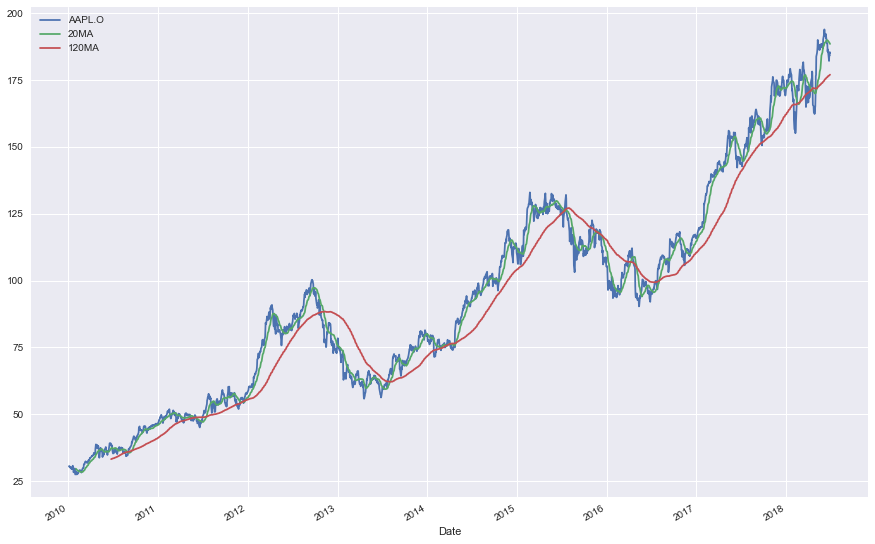

In [26]:
data[['AAPL.O','20MA','120MA']].plot(figsize = (15,10))

#### 2.黃金交叉&死亡交叉 : 系統性的(不用肉眼判斷)找出上圖的交叉位置

In [27]:
# 新增一個cross欄位
# 若滿足 20MA > 120MA ，則輸出數值1，若不滿足則輸出數值-1
data['cross'] = np.where( data['20MA'] > data['120MA'] , 1 , -1)
data[['AAPL.O','20MA','120MA','cross']].tail()

,AAPL.O,20MA,120MA,cross
Date,,,,
2018-06-25,182.17,189.2060,176.679917,1
2018-06-26,184.43,189.0325,176.781583,1
2018-06-27,184.16,188.8655,176.874333,1
2018-06-28,185.50,188.7970,176.961833,1
2018-06-29,185.11,188.5405,177.051500,1


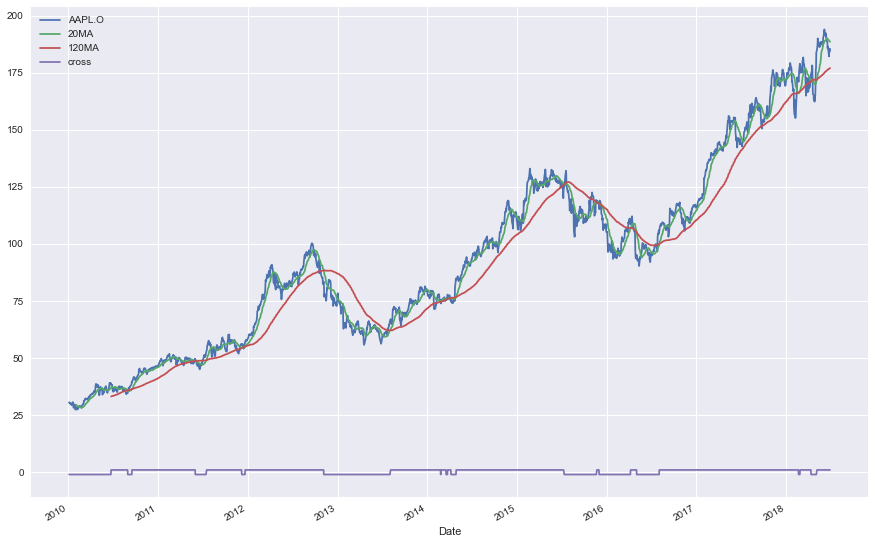

In [28]:
data[['AAPL.O','20MA','120MA','cross']].plot( figsize = (15,10))

##### 上圖的股票、20MA和120MA數值與cross差異過大，不方便閱讀，故進行調整
##### 針對cross，在右邊增加一個座標軸(y軸)
##### 從-1變成1 : 黃金交叉
##### 從1變成-1 : 死亡交叉

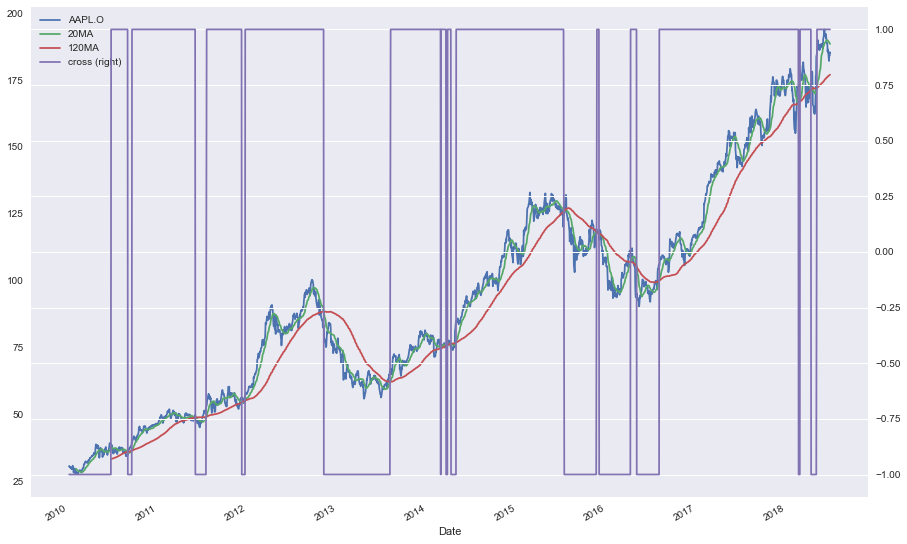

In [29]:
data[['AAPL.O','20MA','120MA','cross']].plot( figsize = (15,10) , secondary_y = 'cross' )

## <8> 迴歸分析

#### 1.分析SPX和VIX之關係

In [30]:
data2 = data[['.SPX','.VIX']]
data2.head()

,.SPX,.VIX
Date,,
2010-01-04,1132.99,20.04
2010-01-05,1136.52,19.35
2010-01-06,1137.14,19.16
2010-01-07,1141.69,19.06
2010-01-08,1144.98,18.13


- 趨勢圖

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B5B2A504F0>,
      dtype=object)

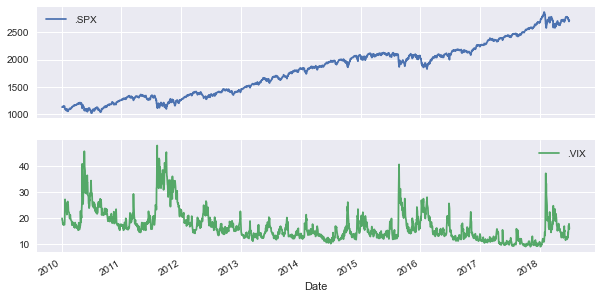

In [31]:
data2.plot(figsize = (10,5),subplots = True)

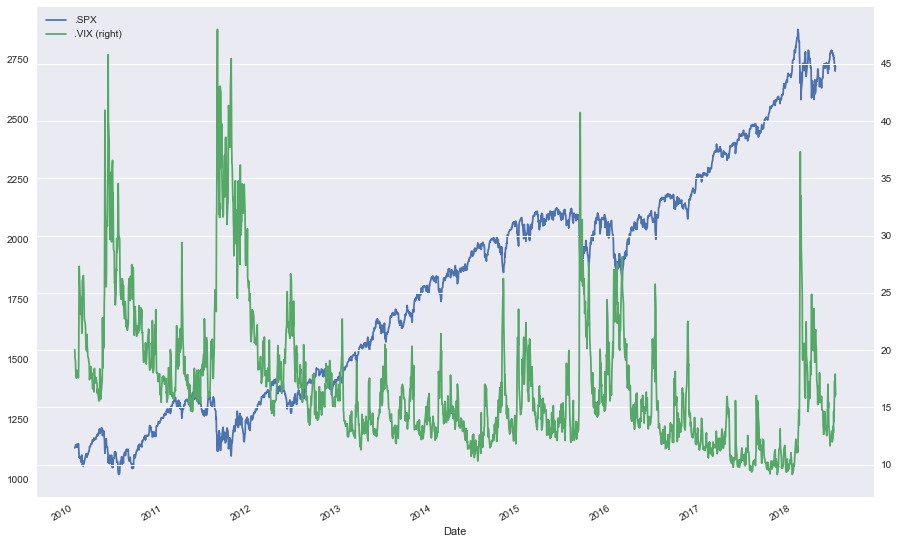

In [32]:
data2.plot(figsize = (15,10) , secondary_y = '.VIX')

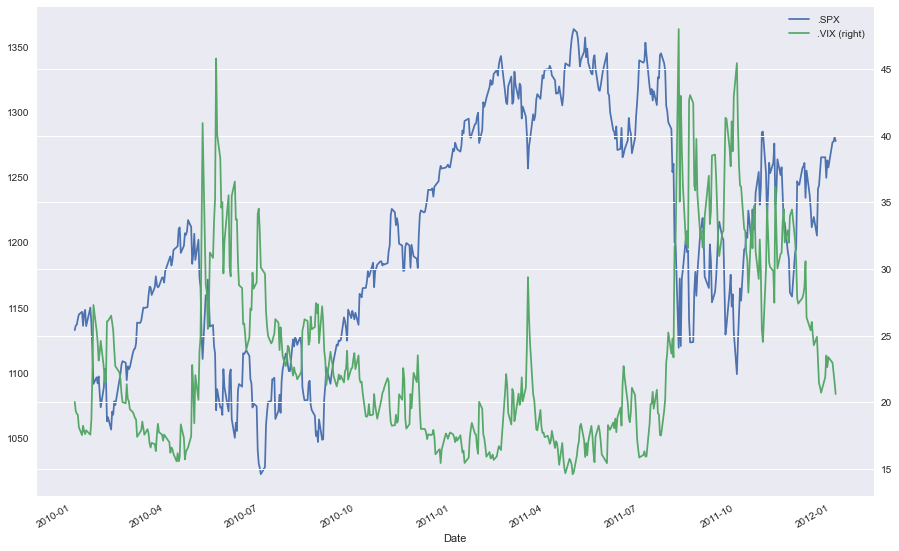

In [33]:
# 由於上圖資料太密集難以看出關係，故只選取部分範圍的資料作圖

data2.loc[:'2012-01-08'].plot(figsize = (15,10) , secondary_y = '.VIX')

- 分佈圖&散佈圖使用pandas內的作圖函數
##### (1) 使用pandas內的作圖函數 : pd.plotting
##### (2) plotting.scatter_matrix : 畫散佈矩陣圖(2個變數做成2x2矩陣，共4個圖)
##### (3) alpha : 選擇透明度(0~1)，數值愈大透明度愈低，適用於資料有許多重疊時
##### (4) diagonal : 選擇圖的類型，例如「kde」為密度圖

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B5B30A5730>,
      dtype=object)

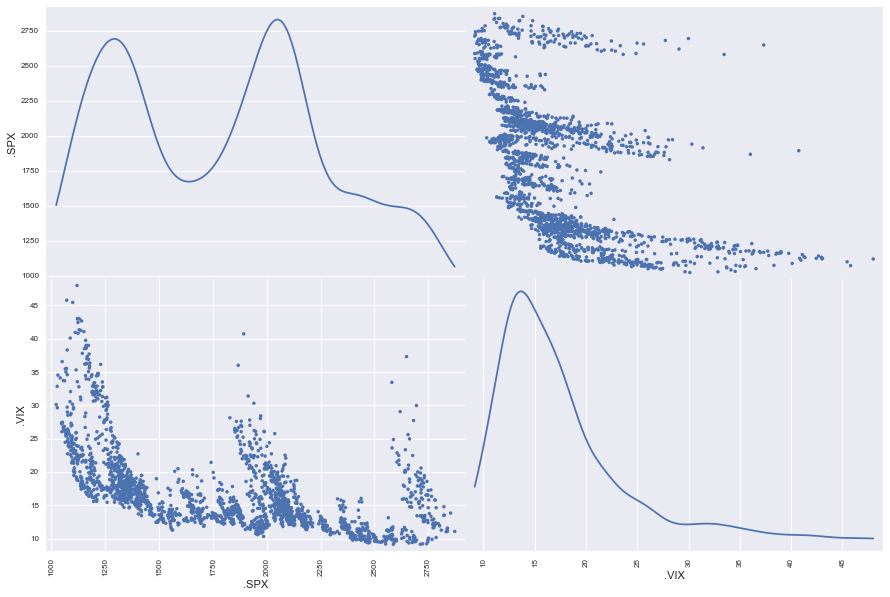

In [34]:
pd.plotting.scatter_matrix(data2,
                           alpha = 1,
                            diagonal = 'kde',
                            figsize = (15,10)
                           )

In [35]:
# 對SPX成長率和VIX成長率作圖
growth = np.log( data2 / data2.shift(1) )
growth.tail()

,.SPX,.VIX
Date,,
2018-06-25,-0.013820,0.229947
2018-06-26,0.002202,-0.084863
2018-06-27,-0.008642,0.117783
2018-06-28,0.006160,-0.061009
2018-06-29,0.000758,-0.046153


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B5B54D8D60>,
      dtype=object)

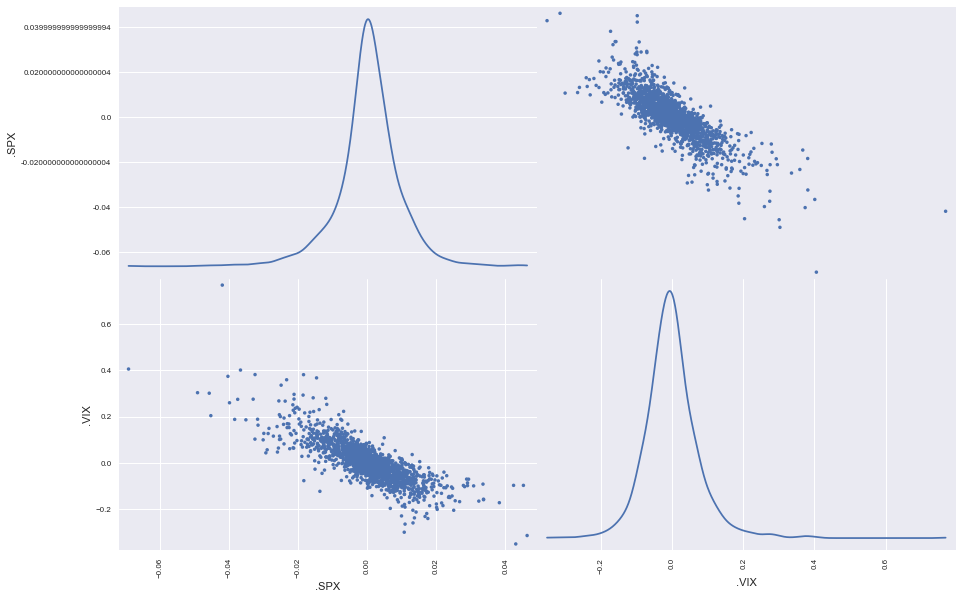

In [36]:
pd.plotting.scatter_matrix( growth,
                          alpha = 1,
                          diagonal = 'kde',
                          figsize = (15,10)
                          )

#### 2.建立迴歸方程式 : np.polyfit  (還有其他方法可建議迴歸式)
- X : SPX成長率
- Y : VIX成長率

In [37]:
growth.head()

,.SPX,.VIX
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868
2010-01-07,0.003993,-0.005233
2010-01-08,0.002878,-0.050024


- 由於資料中有遺漏值(X和Y必須圍成對樣本)，會使得無法計算樣本迴歸方程式，故必須先處理資料

In [38]:
growth.dropna(inplace = True)
growth.head()

,.SPX,.VIX
Date,,
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868
2010-01-07,0.003993,-0.005233
2010-01-08,0.002878,-0.050024
2010-01-11,0.001745,-0.032514


- 建立樣本迴歸方程式

In [39]:
# deg 迴歸式中X的最高次方
# 例如 : deg = 1 , 則迴歸式為 Y = b0 + b1X
#        deg = 2 , 則迴歸式為 Y = b0 + b1X +b2(X**2)
# 輸出結果 : array([b1,b0])
reg = np.polyfit( growth['.SPX'], growth['.VIX'], deg = 1)
reg

array([-6.65160028e+00,  2.62132142e-03])

- 先畫散佈圖

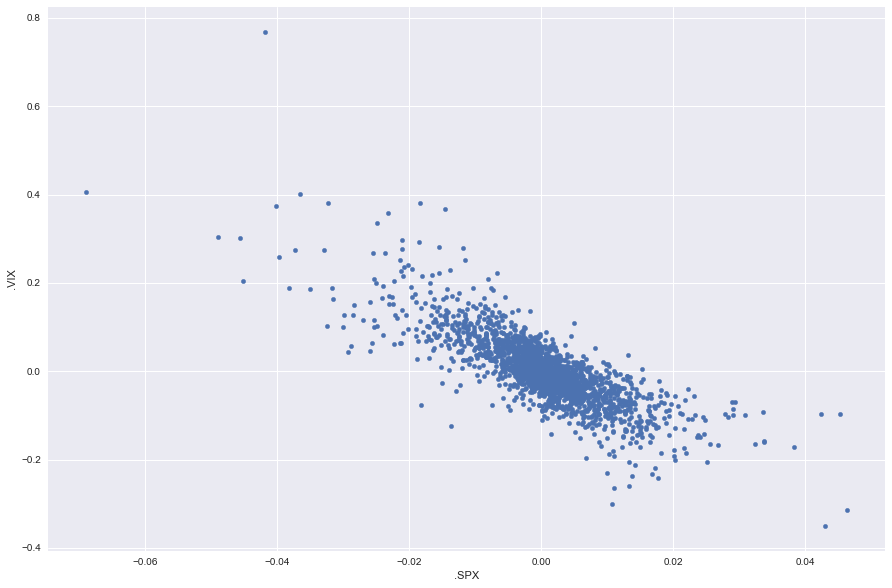

In [40]:
sca = growth.plot(kind = 'scatter',
                  x = '.SPX',
                  y = '.VIX',
                  figsize = (15,10)
                 )

- 再將樣本迴歸方程式畫在散佈圖(sca)上
- np.polyval(y,x) : y = Y_hat = b0_hat + b1_hat(X) = 將X帶入樣本迴歸式估計出來的Y

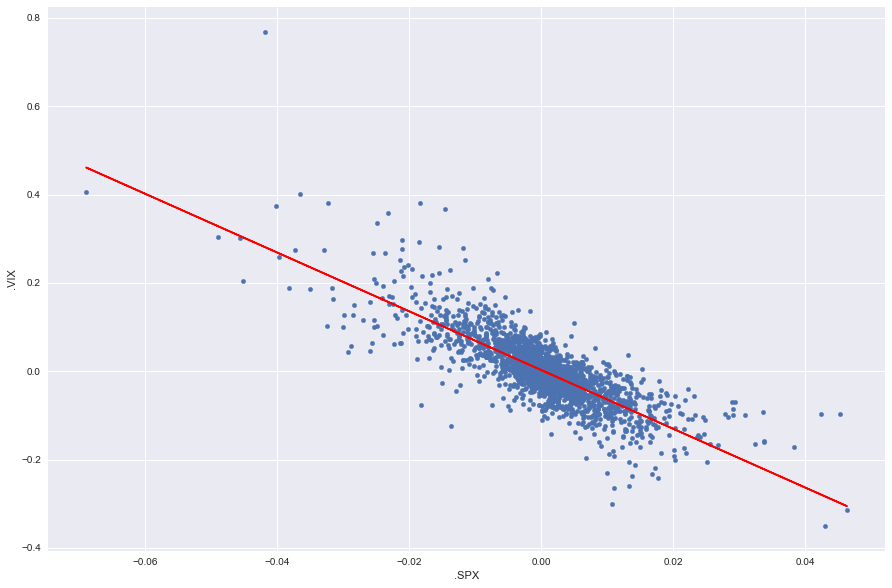

In [41]:
sca = growth.plot(kind = 'scatter',
                  x = '.SPX',
                  y = '.VIX',
                  figsize = (15,10)
                 )


sca.plot(growth['.SPX'],
        np.polyval(reg, growth['.SPX']),
         'r'   # 迴歸式改為紅色
        )

#### 3.相關係數

In [42]:
growth.corr()

,.SPX,.VIX
.SPX,1.000000,-0.804382
.VIX,-0.804382,1.000000


#### 4.計算隨著時間變化，相關係數的變化情形並以圖呈現 
- 利用「時間窗口」

In [43]:
# 每250天計算一個相關係數
growth['.SPX'].rolling(window = 250).corr(growth['.VIX'])

Date
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
2010-01-11         NaN
                ...   
2018-06-25   -0.808644
2018-06-26   -0.807179
2018-06-27   -0.807115
2018-06-28   -0.807475
2018-06-29   -0.807254
Length: 2137, dtype: float64

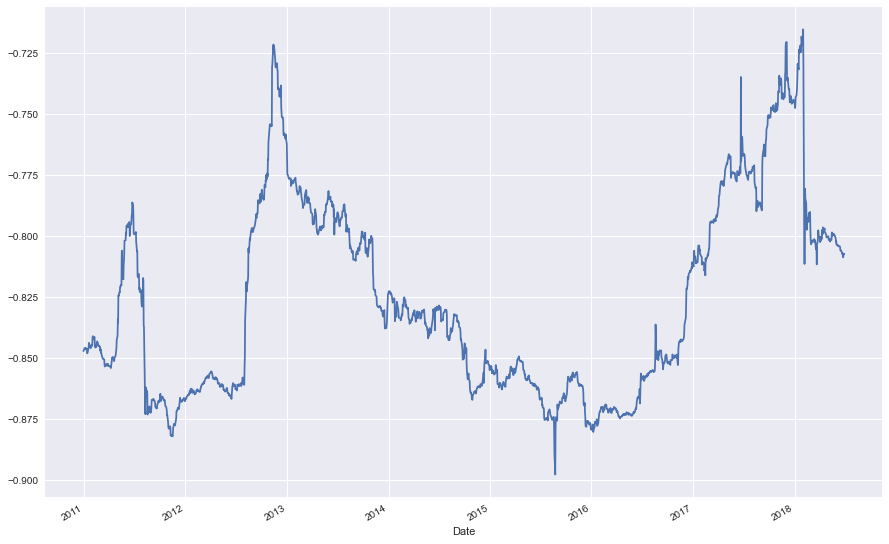

In [44]:
growth['.SPX'].rolling(window = 250).corr(growth['.VIX']).plot(figsize = (15,10) )